# SESI 11 - Regression Models
Nama : Syaima Radestya <br>
Kode Peserta : PYTN-KS10-011 <br>
Program : Introduction to Python for Data Science

# Introduction to Machine Leearning
***
*What is Artifical Intellegence?* <br>
AI yaitu cara membuat komputer menjadi intelligence secara artifically. Satu alasan utama di balik mengapa kita membutuhkan AI yaitu untuk mengotomatiskan tugas-tugas yang menurut orang berlebihan. <br>
### Machine Learning
Machine Learning adalah penerapan dari AI yang memberikan kemampuan kepada komputer untuk belajar dan berkembang dari pengalaman tanpa harus diprogram secara explisit. Machine learning dibutuhkan untuk menyelesaikan pekerjaan yang terlalu rumit bagi manusia untuk dicoding secara langsung.



### Terminologi
* Dataset: a set of data examples, that contain features important to solving the problem
* Features: important pieces of data that help us understand problem.
* Model: the representation (internal model) of a phenomenon that a mchine learning algorithm has learnt.


### Process
1.	Data collection: collect the data that the algorithm will learn from
2.	Data Preparation: format and engineer the data into the optional format, extracing important features and performing dimensionality reduction
3.	Training (fitting stage): this is where the ML algorithm actually learns by showing it the data that has been collected and prepared
4.	Evaluation: test the model to see how well it performs
5.	Tuning: fine tune the model to maximise it’s performance (Sempurnakan model untuk memaksimalkan kinerjanya)


### Machine Learning Approaches 
No Free Lunch Theorem terkenal dalam machine learning yang menyatakan bahwa tidak ada algoritma tunggal yang akan bekerja dengan baik untuk semua tugas. Setiap tugas yang kita coba selesaikan memiliki keistimewaannya sendiri. Oleh karena itu, ada banyak algoritma dan pendekatan yang sesuai dengan setiap masalah individu.


# REGRESSION
***
Regression yaitu mencari hubungan antar variabel dan merupakan bentuk lain dari supervised learning. Perbedaan antara classification dan regression adalah bahwa regression menghasilkan angka daripada kelas. Oleh karena itu, regression berguna saat memprediksi masalah berbasis angka seperti harga pasar saham, suhu untuk hari tertentu, atau probabilitas suatu peristiwa.
fitur dependen/dependent features disebut variabel dependen/dependent variables, output, atau responses.
fitur independen disebut variabel independen/independent variables, input, atau predictors.

*When do you need Regression?* <br>
Biasanya, kita melakukan regresi untuk menjawab apakah dan bagaimana beberapa fenomena memengaruhi yang lain atau bagaimana terkaitnya variabel yang ada. Regresi juga berguna saat kita ingin meramalkan respons menggunakan kumpulan prediktor baru.


### Implementing Linear Regression in Python
Simple Linear Regression With Sckit-learn <br>
Ada lima langkah dasar menerapkan simple linear regression:
+ import packages and classes you need
+ provide data to work with and eventually do appropriate transformations
+ create a regression model and fit it with existing data
+ check the results of model fitting to know whether the model is satisfactory
+ apply the model for predictions


In [95]:
%matplotlib inline

# set seaborn plot defaults.
# This can be safely commented out
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

In [96]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [97]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


### Regression Sample

In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [99]:
# kolom horsepower (x) dan price (y)
df_2d = df[['horsepower', 'price']]
df_2d.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [100]:
x = df[['horsepower']] # dataframe / matrix
y = df['price'] # series / vector

# Training Model
model = LinearRegression(normalize=True)
model.fit(x,y)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


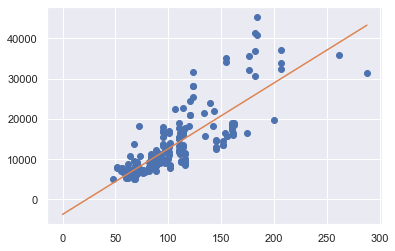

In [101]:
import numpy as np
x_fit = np.linspace(0, 288, 100)[:, np.newaxis]
y_fit = model.predict(x_fit)

plt.plot(x.values.squeeze(), y.values, 'o')
plt.plot(x_fit.squeeze(), y_fit);

In [102]:
x = np.arange(10)
y = 2 * x + 1

In [103]:
X = x[:, np.newaxis] #Ubah kedalam bentuk yang dikenal scikit-learn
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


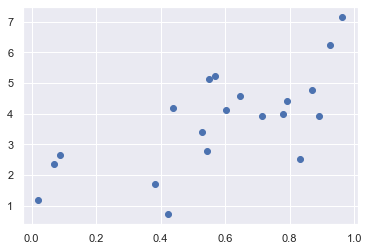

In [104]:
# Buat data yang simpel
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

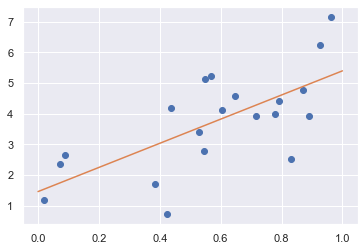

In [105]:
model = LinearRegression()
model.fit(X, y)

# Plot data dan garis
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

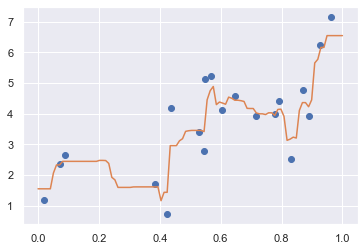

In [106]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot data dan garis
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

## Unsupervised Learning: Reduksi Dimensi dan Klaster
***

### Reduksi Dimensi

In [107]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# buat model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit model
knn.fit(X, y)

# Iris jenis apa yang memiliki 3cm x 5cm sepal dan 4cm x 2cm petal?
# panggil method predict
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


In [108]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


Arti dari 2 componen:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


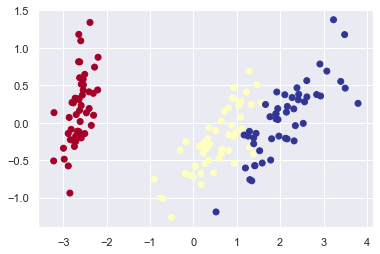

In [109]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Arti dari 2 componen:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

### Klaster : K-Means

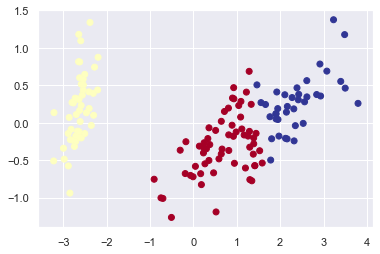

In [110]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');